In [60]:
import pandas as pd
import numpy as np
from numpy import isnan
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.size'] = 14


In [61]:
data1 = pd.read_csv("data_1.csv")
data2 = pd.read_csv("data_2.csv")
data3 = pd.read_csv("data_3.csv")

we first concatenated three sub-datasets to get the entire dataset and then modified it

In [62]:
data_total = pd.concat([data1, data2, data3], axis=0)
data_total = data_total.drop(columns=['startDateTime', 'stopDateTime'])  
data_total = shuffle(data_total)  #shuffle the dataframe
# data_total

/Users/mac/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [63]:
variables_name = data_total.columns.values.tolist()
for i in variables_name:  #change all the NaN in dataframe into 0    
    d1 = data_total[i]
    d1[pd.isnull(data_total[i]) == True] = '0'   #change the NaN into 0    
variables_name.remove('Tag')
# data_total

In [64]:
data_total['sensorInterfaceId'] = data_total['sensorInterfaceId'].astype(str)
data_total = data_total.apply(LabelEncoder().fit_transform)  #transform all the strings into integers or floats

data_attack = data_total[data_total['Tag'] == 0]
data_normal = data_total[data_total['Tag'] == 1]
data_normal = data_normal.sample(n=37460)#random choose 37460 normal packets, which have the number of attack packets

data_adjusted = pd.concat([data_attack, data_normal], axis=0)#we create a dataframe with 1:1 rate of normal and attack
data_adjusted = shuffle(data_adjusted)  #shuffle the dataframe
# data_adjusted

then we use the adjusted dataframe to train & test our models and evaluate their result

In [65]:
X = data_adjusted[variables_name]  #we use the adjusted 1:1 rate dataframe to train the model
Y = data_adjusted['Tag']  #target attribute
Y

136339    1
165904    0
172254    0
120752    0
122952    0
118625    1
146065    0
106909    0
81100     1
86060     1
186395    1
102316    1
44272     1
160147    0
26923     1
167469    0
54667     1
174915    1
123172    1
167052    1
162154    1
146304    0
107840    1
135709    0
141635    1
50836     1
47002     1
12540     1
132409    0
106040    0
         ..
73164     1
170494    0
138114    0
122660    0
109315    0
118008    0
77037     1
159139    0
133609    1
134344    0
155286    0
13778     1
114097    0
140206    0
120886    0
88322     1
168771    0
141078    0
90904     1
168665    0
69835     1
142198    1
54686     1
176094    1
110123    0
163103    0
113127    0
122708    0
37549     1
100636    1
Name: Tag, Length: 74920, dtype: int64

In [66]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0, test_size =0.1) 
#the proportion is same as the cross-validation of k = 10
# Y_test
X_train

,appName,destination,destinationPayloadAsBase64,destinationPayloadAsUTF,destinationPort,destinationTCPFlagsDescription,direction,protocolName,sensorInterfaceId,source,sourcePayloadAsBase64,sourcePayloadAsUTF,sourcePort,sourceTCPFlagsDescription,totalDestinationBytes,totalDestinationPackets,totalSourceBytes,totalSourcePackets
10355,15,14714,123389,137242,10,8,1,3,1,551,67407,107891,2930,7,691,4,342,5
129515,59,5424,1683,48272,3659,0,1,3,1,542,1773,31475,3795,14,0,0,130,3
110016,15,5845,90275,107242,10,8,0,3,0,548,63012,67474,220,7,49691,154,7374,64
90647,15,7122,1683,48272,10,8,1,3,1,539,1773,31475,50072,7,3662,6,436,6
136303,15,5845,79470,105214,10,8,0,3,0,548,63012,67474,2895,7,49691,154,7374,64
154432,15,5845,78888,103827,10,8,0,3,0,545,63012,67474,416,7,49834,174,8218,78
117176,15,5845,80929,106682,10,8,0,3,0,555,63012,67474,436,7,50050,210,8957,97
9364,14,7122,1683,48272,10,8,1,3,0,535,1773,31475,1330,7,1116,5,339,5
162741,15,5845,77477,103217,10,8,0,3,0,545,63012,67474,3299,7,49834,174,8218,78
45261,60,169,1683,48272,11966,0,1,4,1,542,55233,50605,48523,0,0,0,236,4


In [68]:
clf = RandomForestClassifier(criterion = 'gini', max_depth = None, max_features = 'auto', n_estimators = 200)
# clf = RandomForestClassifier()

In [146]:
#use grid search to adjust the parameters
grid_param = { 
    'n_estimators': [10, 100, 200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [None,4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
gd_sr = GridSearchCV(estimator=clf,  
                     param_grid=grid_param,
                     scoring='accuracy',
                     cv=10,
                     n_jobs=-1)   #-1 means the software uses all available cpus
gd_sr.fit(X, Y)

best_parameters = gd_sr.best_params_
print(best_parameters) 

{'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'n_estimators': 200}


In [148]:
scores1 = cross_val_score(clf, X, Y, cv = 10, scoring = 'accuracy')
# scores1 = cross_val_score(clf, X, Y, cv = 10, scoring = 'roc_auc')
print(scores1.mean())


0.9998531767218365


1.0


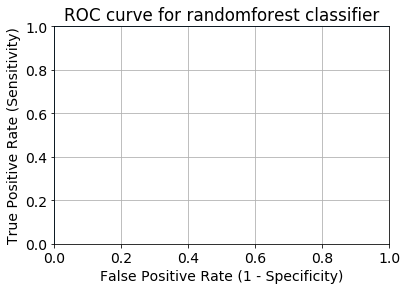

In [69]:
clf.fit(X_train, Y_train)
Y_pred_prob = clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(Y_test, Y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for randomforest classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.savefig('./roc_randomforest.png')
print (metrics.roc_auc_score(Y_test, Y_pred_prob))

In [71]:
Y_pred_class = clf.predict(X_test)
confusion = metrics.confusion_matrix(Y_test, Y_pred_class)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
print ("confusion matrix is: %s" % confusion)
print("TP is: %s" % TP)
print("TN is: %s" % TN)
print("FP is: %s" % FP)
print("FN is: %s" % FN)
print ("accuracy is: %s" % metrics.accuracy_score(Y_test, Y_pred_class))
print ("sensitivity is: %s" % metrics.recall_score(Y_test, Y_pred_class))
print ("specificity is: %s" % (TN / float(TN + FP)))
print ("false positive rate is: %s" % (FP / float(TN + FP)))
print ("precison is: %s" % metrics.precision_score(Y_test, Y_pred_class))

confusion matrix is: [[3740    0]
 [   0 3752]]
TP is: 3752
TN is: 3740
FP is: 0
FN is: 0
accuracy is: 1.0
sensitivity is: 1.0
specificity is: 1.0
false positive rate is: 0.0
precison is: 1.0


In [72]:
clf1 = MLPClassifier()

In [73]:
scores1 = cross_val_score(clf1, X, Y, cv = 10, scoring = 'accuracy')
# scores1 = cross_val_score(clf, X, Y, cv = 10, scoring = 'roc_auc')
print(scores1.mean())

0.9884410037373199


0.9927983863151775


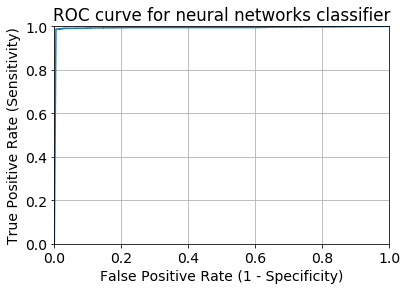

In [74]:
clf1.fit(X_train, Y_train)
Y_pred_prob = clf1.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(Y_test, Y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for neural networks classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.savefig('./roc_neuralnetworks.png')
print (metrics.roc_auc_score(Y_test, Y_pred_prob))

In [75]:
Y_pred_class = clf1.predict(X_test)
confusion = metrics.confusion_matrix(Y_test, Y_pred_class)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
print ("confusion matrix is: %s" % confusion)
print("TP is: %s" % TP)
print("TN is: %s" % TN)
print("FP is: %s" % FP)
print("FN is: %s" % FN)
print ("accuracy is: %s" % metrics.accuracy_score(Y_test, Y_pred_class))
print ("sensitivity is: %s" % metrics.recall_score(Y_test, Y_pred_class))
print ("specificity is: %s" % (TN / float(TN + FP)))
print ("false positive rate is: %s" % (FP / float(TN + FP)))
print ("precison is: %s" % metrics.precision_score(Y_test, Y_pred_class))

confusion matrix is: [[3722   18]
 [  55 3697]]
TP is: 3697
TN is: 3722
FP is: 18
FN is: 55
accuracy is: 0.9902562733582488
sensitivity is: 0.9853411513859275
specificity is: 0.9951871657754011
false positive rate is: 0.004812834224598931
precison is: 0.9951547779273217


In [76]:
clf2 = LogisticRegression(C = 10.0, penalty = 'l1')
# clf2 = LogisticRegression()

In [153]:
grid={"C":np.logspace(-3,3,7), 
      "penalty":['l1','l2']}# l1 lasso l2 ridge
gd_sr = GridSearchCV(estimator=clf2,  
                     param_grid=grid,
                     scoring='accuracy',
                     cv=10,
                     n_jobs=-1)   #-1 means the software uses all available cpus
gd_sr.fit(X, Y)

best_parameters = gd_sr.best_params_
print(best_parameters)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


{'C': 10.0, 'penalty': 'l1'}


In [155]:
scores1 = cross_val_score(clf2, X, Y, cv = 10, scoring = 'accuracy')
# scores1 = cross_val_score(clf, X, Y, cv = 10, scoring = 'roc_auc')
print(scores1.mean())

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework

0.9917912439935931


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9978194160975108


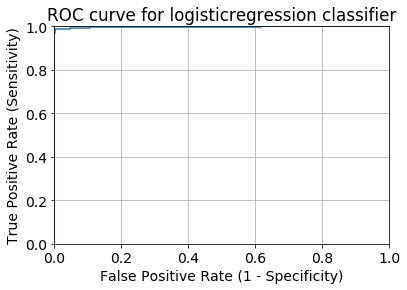

In [77]:
clf2.fit(X_train, Y_train)
Y_pred_prob = clf2.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(Y_test, Y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for logisticregression classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.savefig('./roc_logisticregression.png')
print (metrics.roc_auc_score(Y_test, Y_pred_prob))

In [78]:
Y_pred_class = clf2.predict(X_test)
confusion = metrics.confusion_matrix(Y_test, Y_pred_class)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
print ("confusion matrix is: %s" % confusion)
print("TP is: %s" % TP)
print("TN is: %s" % TN)
print("FP is: %s" % FP)
print("FN is: %s" % FN)
print ("accuracy is: %s" % metrics.accuracy_score(Y_test, Y_pred_class))
print ("sensitivity is: %s" % metrics.recall_score(Y_test, Y_pred_class))
print ("specificity is: %s" % (TN / float(TN + FP)))
print ("false positive rate is: %s" % (FP / float(TN + FP)))
print ("precison is: %s" % metrics.precision_score(Y_test, Y_pred_class))

confusion matrix is: [[3733    7]
 [  55 3697]]
TP is: 3697
TN is: 3733
FP is: 7
FN is: 55
accuracy is: 0.9917245061398825
sensitivity is: 0.9853411513859275
specificity is: 0.9981283422459893
false positive rate is: 0.0018716577540106951
precison is: 0.9981101511879049


In [81]:
clf3 = KNeighborsClassifier()
# clf3 = KNeighborsClassifier()

In [140]:
scores1 = cross_val_score(clf3, X, Y, cv = 10, scoring = 'accuracy')
# scores1 = cross_val_score(clf, X, Y, cv = 10, scoring = 'roc_auc')
print(scores1.mean())

0.9975173518419647


0.9991912334811808


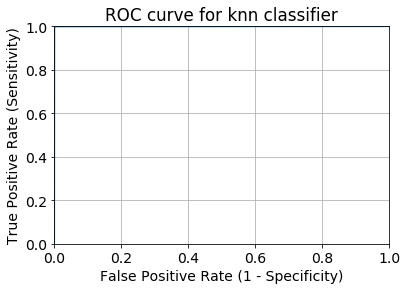

In [82]:
clf3.fit(X_train, Y_train)
Y_pred_prob = clf3.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(Y_test, Y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for knn classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.savefig('./roc_knn.png')
print (metrics.roc_auc_score(Y_test, Y_pred_prob))

In [83]:
Y_pred_class = clf3.predict(X_test)
confusion = metrics.confusion_matrix(Y_test, Y_pred_class)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
print ("confusion matrix is: %s" % confusion)
print("TP is: %s" % TP)
print("TN is: %s" % TN)
print("FP is: %s" % FP)
print("FN is: %s" % FN)
print ("accuracy is: %s" % metrics.accuracy_score(Y_test, Y_pred_class))
print ("sensitivity is: %s" % metrics.recall_score(Y_test, Y_pred_class))
print ("specificity is: %s" % (TN / float(TN + FP)))
print ("false positive rate is: %s" % (FP / float(TN + FP)))
print ("precison is: %s" % metrics.precision_score(Y_test, Y_pred_class))

confusion matrix is: [[3736    4]
 [  12 3740]]
TP is: 3740
TN is: 3736
FP is: 4
FN is: 12
accuracy is: 0.99786438868126
sensitivity is: 0.9968017057569296
specificity is: 0.9989304812834224
false positive rate is: 0.0010695187165775401
precison is: 0.9989316239316239
